In [1]:
#Author: George Azzari

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm, colorbar
# %pylab inline

#### Here is some docs on color maps:

http://matplotlib.org/api/colorbar_api.html

http://matplotlib.org/api/colors_api.html#matplotlib.colors.Normalize

http://wiki.scipy.org/Cookbook/Matplotlib/ColormapTransformations

http://matplotlib.org/examples/api/colorbar_only.html

#### Custom color map function

In [7]:
#Author: Chris Slocum 
#Web: http://schubert.atmos.colostate.edu/~cslocum/custom_cmap.html

def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    bit_rgb = np.linspace(0,1, 256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))
    cmap = mcolors.LinearSegmentedColormap('my_colormap', cdict, 256)
    return cmap

#### Discretize existing color maps

In [8]:
#Credits: http://wiki.scipy.org/Cookbook/Matplotlib/ColormapTransformations
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.
    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in xrange(N+1) ]
    # Return colormap object.
    return mcolors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, N)

#### Test

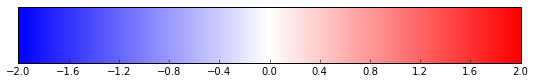

In [9]:
fig = plt.figure(figsize=(9, 1))
cnorm = mcolors.Normalize(vmin=-2, vmax=2) #linear stretch
c = mcolors.ColorConverter().to_rgb
colors = [c('#0000FF'), c('#FFFFFF'), c('#FF0000')]
mymap = make_cmap(colors, bit=False)
ax = plt.subplot(111)
cbar = colorbar.ColorbarBase(ax, norm=cnorm, orientation='horizontal', cmap=mymap)
plt.savefig('cont_map.png', dpi=150, facecolor='w', edgecolor='w',orientation='portrait', bbox_inches='tight')

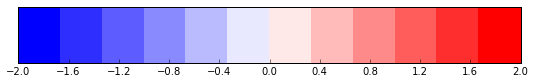

In [10]:
fig = plt.figure(figsize=(9, 1))
# cnorm2 = mcolors.BoundaryNorm(linspace(-2,2,12), 12) #linear stretch
mymap2 = cmap_discretize(mymap, N=12)
ax2 = plt.subplot(111)
cbar = colorbar.ColorbarBase(ax2, norm=cnorm, orientation='horizontal', cmap=mymap2)
# plt.savefig('discr_map.png', dpi=150, facecolor='w', edgecolor='w',orientation='portrait', bbox_inches='tight')

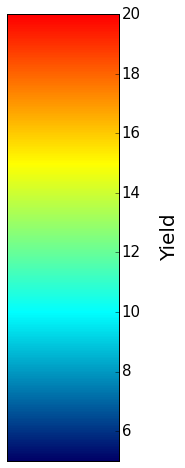

In [33]:
fig = plt.figure(figsize=(2, 8))
cnorm = mcolors.Normalize(vmin=5, vmax=20) #linear stretch
c = mcolors.ColorConverter().to_rgb
colors = [c("#000066"), c("#00FFFF"),c("#FFFF00"), c("#FF0000")]
mymap = make_cmap(colors, bit=False)
ax = plt.subplot(111)
cbar = colorbar.ColorbarBase(ax, norm=cnorm, orientation='vertical', cmap=mymap)
cbar.set_label('Yield',size=20, labelpad=20)
cbar.ax.tick_params(labelsize=15) 
plt.savefig('jetbar.png', dpi=150, orientation='portrait', bbox_inches='tight', transparent=True)